## SBPRS (Sentiment Analysis and Product Recommendation System)
### Akash akashb10@yahoo.com
### MLC22
### Submission as part of Capstone Project requirement

### 1 Problem Statement:

The ECommerce business is quite popular today.  Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. <i>Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.</i>  

Suppose you are working as a Machine Learning Engineer in an e-commerce company named <b>'Ebuss'</b>. <b>Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.</b>

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.  

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given <b><i>"their" past reviews and ratings</b></i>.  

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks:  
a) Data sourcing and sentiment analysis  
b) Building a recommendation system  
c) Improving the recommendations using the sentiment analysis model (integrate sentiment with recommendation systems)  
d) Deploying the end-to-end project with a user interface (Heroku)  

#### 1.1: Core Requirements

Design and Deploy a Machine Learning model to make product recommendations to users based on their past sentiments gauged from users' reviews and ratings of various products.

### 2: Prepare the foundation for Model building

- Prepare the environment and libraries
- Load the data
- Conduct EDA

#### 2.1 Import Relevant Python Libraries

In [1]:
#Base Libraries

import numpy as np
import pandas as pd
import calendar
import time
import requests
import random
import re
import math
import gzip
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
from matplotlib import cm

from pandas import DataFrame

from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator

In [2]:
#NLP related Libraries

import nltk

from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import xgboost as xgb
from xgboost import XGBClassifier

#### 2.2: Data set - Understanding and initial analysis "EDA"


In [3]:
# Load the data into a dataframe for understanding and initial analysis
# No need to setup any path as dataset resides in same file folder as Python notebook

df = pd.read_csv('sample30.csv', sep=',')
print('Info on Dataset:')
df.info()

Info on Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object

In [4]:
# Size of data frame
print('Shape is:')
df.shape

Shape is:


(30000, 15)

In [5]:
# Sample of data in dataset
print('Sample of data in our Dataset:')
df.head(5)

Sample of data in our Dataset:


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [6]:
print('Dataset Columns are:')
df.columns

Dataset Columns are:


Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

#### 2.3: EDA - Dataset Attributes overview

<b>Following information captures the metadata of the dataset:</b>

&emsp;<b>id</b> &emsp; String Identifier identifying each review/rating provided by the user for a specific product  
&emsp;<b>brand</b> &emsp; Product brand  
&emsp;<b>categories</b> &emsp; Product Category like household essentials, books, personal care products, medicines etc  
&emsp;<b>manufacturer</b> &emsp; Product manufacturer  
&emsp;<b>name</b> &emsp; Product name  
&emsp;<b>reviews_date</b> &emsp; Date of the Review as done by the User  
&emsp;<b>reviews_didPurchase</b> &emsp; True/False flag for whether the user purchased the product or did not purchase  
&emsp;<b>reviews_doRecommend</b> &emsp; True/False flag for whether the user recommended the product or did not recommend  
&emsp;<b>reviews_rating</b> &emsp; Users Rating for the specfic product  
&emsp;<b>reviews_text</b> &emsp; Users Review for the specfic product  
&emsp;<b>reviews_title</b> &emsp; Title of the review as provided by the User  
&emsp;<b>reviews_userCity</b> &emsp; User's City of residence  
&emsp;<b>reviews_userProvince</b> &emsp; User's Province of residence  
&emsp;<b>reviews_username</b> &emsp; User's username (identifier)  
&emsp;<b>user_sentiment</b> &emsp; Positive/Negative sentiment flag as shared by the User  

#### Inference: Some quick observations as below:
- Dataset is at a Review level
- There is some missing data or NaN values in some of the columns
- Lot of Rating 5 scores
- There appears to be duplication in data as same User has reviewed same Product multiple times
- Some duplication in Review data when grouped by User and Product Name, but Ratings are differing at times
- Product name and Brand could be combined as they are connected data values 
- User sentiment has values - POSITIVE and NEGATIVE
- Review Title and Review Text are connected and could be combined as one piece of information as "Review"
- Review data being free flowing text data, it will need some pre-processing to make it more meaningful

#### 2.4: EDA - Data Quality

##### 2.4.1: Missing Data Values

In [7]:
# Any missing data values?

print("Attribute missing data values:")
print(df.isnull().any())

Attribute missing data values:
id                      False
brand                   False
categories              False
manufacturer             True
name                    False
reviews_date             True
reviews_didPurchase      True
reviews_doRecommend      True
reviews_rating          False
reviews_text            False
reviews_title            True
reviews_userCity         True
reviews_userProvince     True
reviews_username         True
user_sentiment           True
dtype: bool


In [8]:
# Percentage of missing values

print("% Missing values for each attribute:")
null_info = df.isna().sum() / len(df) * 100
null_info.sort_values(ascending = False).head(1000).round(4)

% Missing values for each attribute:


reviews_userProvince    99.4333
reviews_userCity        93.5700
reviews_didPurchase     46.8933
reviews_doRecommend      8.5667
reviews_title            0.6333
manufacturer             0.4700
reviews_username         0.2100
reviews_date             0.1533
user_sentiment           0.0033
reviews_text             0.0000
reviews_rating           0.0000
name                     0.0000
categories               0.0000
brand                    0.0000
id                       0.0000
dtype: float64

In [9]:
print("Count of Records by attribute having missing values:")
print(df.isnull().sum())

Count of Records by attribute having missing values:
id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64


##### Inference:
- Note: one missing value in user_sentiment

#####  2.4.2: Dropping Columns with very few Data values

In [10]:
# Columns with less than 10% of data values, identifying and dropping those

missing_val_threshold = len(df)*(0.1)
df.dropna(thresh = missing_val_threshold, axis = 1, inplace = True)
print("Percentage of missing values by attribute:")
print(df.isna().mean().round(4)*100)

Percentage of missing values by attribute:
id                      0.00
brand                   0.00
categories              0.00
manufacturer            0.47
name                    0.00
reviews_date            0.15
reviews_didPurchase    46.89
reviews_doRecommend     8.57
reviews_rating          0.00
reviews_text            0.00
reviews_title           0.63
reviews_username        0.21
user_sentiment          0.00
dtype: float64


#####  2.4.3: Understanding Reviews which have been done by users who did the purchase

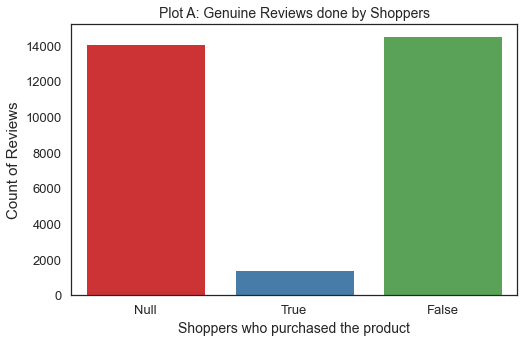

In [11]:
# Understanding how many reviews are done by Shopper who did a purchase = Genuine Reviews
# Refer reviews_didpurchase column, replace null/NaN values with 'NULL'

df['reviews_didPurchase'].fillna('Null', inplace=True)

# Plot distribution of reviews_didpurchase

plt.figure(figsize=(8,5))
sns.set_theme(style="white")
ax = sns.countplot(x=df['reviews_didPurchase'],palette="Set1")
ax.set_xlabel(xlabel="Shoppers who purchased the product", fontsize=14)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=15)
ax.axes.set_title('Plot A: Genuine Reviews done by Shoppers', fontsize=14)
ax.tick_params(labelsize=13)
plt.show()

In [12]:
print("Count of Reviews which are related to a Purchase:")
df['reviews_didPurchase'].value_counts()

Count of Reviews which are related to a Purchase:


False    14498
Null     14068
True      1434
Name: reviews_didPurchase, dtype: int64

##### Inference:
- Users who provided the reviews and actually did a purchase ("Real Shoppers") is just 4% in the dataset.
- Considering this value is so low it does not provide meaningful analysis and should be discarded.

#####  2.4.4: Understanding Product recommendations made by Reviewers 

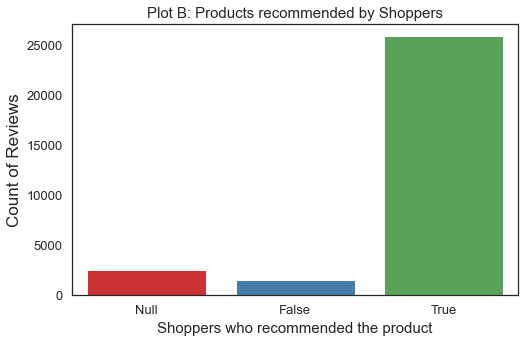

In [13]:
# Understanding one more attribute of 'what product recommendations have been made by reviewers'
# Refer reviews_doRecommend column, replace all null/NAN values with 'NULL'

df['reviews_doRecommend'].fillna('Null', inplace=True)

# Plot distribution of reviews_didpurchased

plt.figure(figsize=(8,5))
sns.set_theme(style="white")
ax = sns.countplot(x=df['reviews_doRecommend'],palette="Set1")
ax.set_xlabel(xlabel="Shoppers who recommended the product", fontsize=15)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Plot B: Products recommended by Shoppers', fontsize=15)
ax.tick_params(labelsize=13)
plt.show()

In [14]:
print("Count of Shoppers who did Product recommendations:")
df['reviews_doRecommend'].value_counts()

Count of Shoppers who did Product recommendations:


True     25880
Null      2570
False     1550
Name: reviews_doRecommend, dtype: int64

In [15]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

##### Inference:
- Many product recommendations have been made by the users but this column won't be significant for our analysis

#### 2.4.5: Unique values in columns

In [16]:
# Unique values in Key columns

for p_column in ['brand', 'categories', 'manufacturer', 'name','reviews_username', 'reviews_rating', 'user_sentiment']:
  print("Count of unique data values in column %s is: %s" %(p_column, df[p_column].nunique()))

Count of unique data values in column brand is: 214
Count of unique data values in column categories is: 270
Count of unique data values in column manufacturer is: 227
Count of unique data values in column name is: 271
Count of unique data values in column reviews_username is: 24914
Count of unique data values in column reviews_rating is: 5
Count of unique data values in column user_sentiment is: 2


In [17]:
# What are the unique values in Rating and Sentiment columns?, rest have too many values

print ("Unique Rating values are:", df['reviews_rating'].unique())
print ("Unique User Sentiment values are:", df['user_sentiment'].unique())

Unique Rating values are: [5 1 3 4 2]
Unique User Sentiment values are: ['Positive' 'Negative' nan]


##### Note:
- One NaN value in User Sentiment (out of 30K records)

#####  2.4.6: Understanding Product purchases
- Top 20 Products by purchase history
- High rating for Top most product
- Low rating for Top most product 

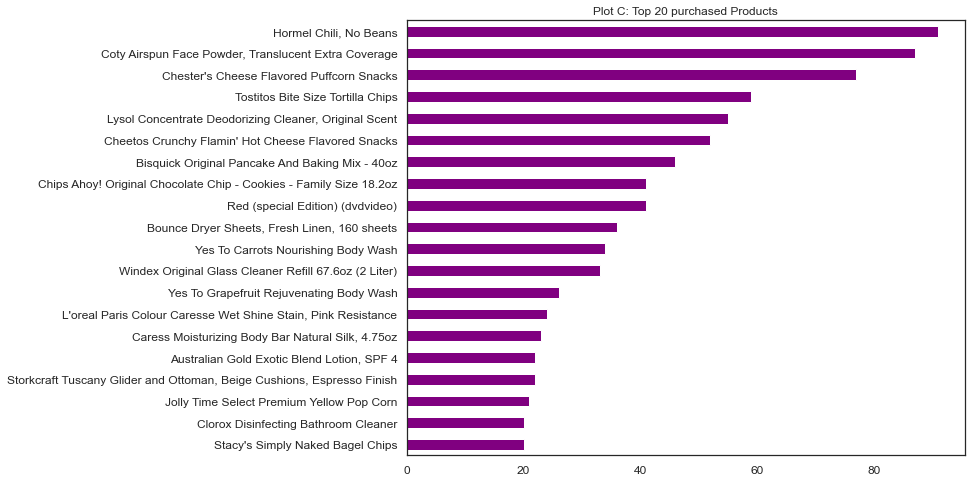

In [18]:
# Ranking top 20 most purchased products done by Shoppers
result = df[df['reviews_didPurchase'] == True]

# set plot size, set axes, set color
result['name'].value_counts()[0:20].plot(kind = 'barh', figsize=[10,8], fontsize=12, color='Purple',
                                         title='Plot C: Top 20 purchased Products').invert_yaxis()

In [19]:
# High Rating score (= 5) for Top most product for Reviewers who did the purchase
# rate high == 5 rated

toppdct_hirate_df = result[result['name'] == "Hormel Chili, No Beans"]
toppdct_hirate_df = toppdct_hirate_df[toppdct_hirate_df['reviews_rating']==5]

toppdct_hirate_df[[ 'reviews_rating', 'reviews_text']].head(10)

,reviews_rating,reviews_text
6338,5,Taste and texture are perfect for a chili dog
6341,5,Lol. Never been asked to review a canned good....
6343,5,I purchased this for my special chili dogs. Th...
6344,5,Tastes great
6345,5,Great for canned chili. Even the kids will eat...
6346,5,Good
6352,5,Great for making chili dogs
6362,5,From the can or on a dog.Great anytime it is d...
6366,5,very good product good price fast delivery I a...
6367,5,This is the best canned chili ever! Quick and ...


In [20]:
# Low Rating scores for Top most product for Reviewers who did the purchase 
# rate low == 1,2,3 rated

toppdct_lorate_df = result[result['name'] == "Hormel Chili, No Beans"]
toppdct_lorate_df = toppdct_lorate_df[toppdct_lorate_df['reviews_rating'].between(1, 3)]

toppdct_lorate_df[[ 'reviews_rating', 'reviews_text']].head(10)

,reviews_rating,reviews_text
6267,1,Bland and want buy again
6277,2,Runny
6278,2,This tastes like canned hot dog sauce more tha...
6280,2,"I LIKE HORMEL CHILI, BUT, WALMART HAS PROBLEMS..."
6281,3,"Good product, way too expensive."
6284,3,"The chili is great on a hotdog, but it doesn't..."
6286,3,Great for chilly dogs
6287,3,Ok for chili in a can
6288,3,The chilie was good on the hot dogs and cheese...
6291,3,It's ok


#####  2.4.7: Understanding Brands which have highest positive sentiment 

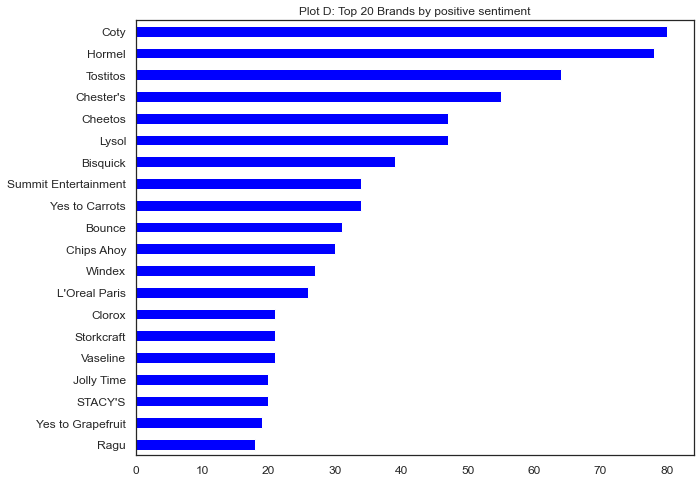

In [21]:
# Ranking Top 20 Brands based on the positive reviews done by Shoppers

result = df[(df['reviews_didPurchase'] == True) & (df.user_sentiment=="Positive")]
result['brand'].value_counts()[0:20].plot(kind = 'barh', figsize=[10,8], fontsize=12,color='Blue',
                                          title='Plot D: Top 20 Brands by positive sentiment').invert_yaxis()

#####  2.4.8: Understanding Brands which have highest negative sentiment

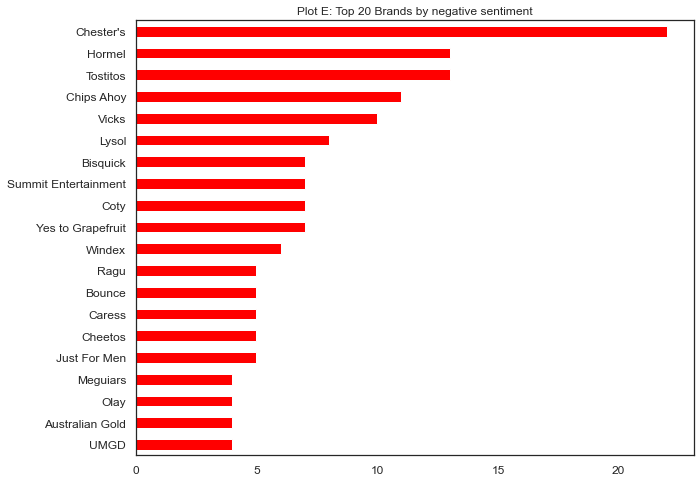

In [22]:
# Ranking Top 20 Brands based on the negative reviews done by Shoppers

result = df[(df['reviews_didPurchase'] == True) & (df.user_sentiment=="Negative")]
result['brand'].value_counts()[0:20].plot(kind = 'barh', figsize=[10,8], fontsize=12,color='Red',
                                          title='Plot E: Top 20 Brands by negative sentiment').invert_yaxis()

##### Inference:
- Coty is the most preferred Brand (positive sentiment).
- Chester's is least preferred Brand (negative sentiment).
- Tostitos and Hormel have both strong positive and strong negative preferences, relatively.
- Rest of the Brands fall in between.

#####  2.4.9: Understanding Categories Distribution

In [23]:
# Providing Meaningfull names to Categories 
df["prod_cat"] = df["categories"].apply(lambda x: x.split(",")[0])

df['prod_cat'] = df['prod_cat'].replace("Food","Food and Beverage")
df['prod_cat'] = df['prod_cat'].replace("Home","Home Essentials")
df['prod_cat'] = df['prod_cat'].replace("Household Essentials","Home Essentials")
df['prod_cat'] = df['prod_cat'].replace("Brand Shop","Home Essentials")
df['prod_cat'] = df['prod_cat'].replace("Featured Brands","Home Essentials")
df['prod_cat'] = df['prod_cat'].replace("Home Improvement","Home Essentials")
df['prod_cat'] = df['prod_cat'].replace("Movies","Entertainment: Movies and TV")
df['prod_cat'] = df['prod_cat'].replace("Movies & TV Shows","Entertainment: Movies and TV")
df['prod_cat'] = df['prod_cat'].replace("Household Chemicals","Home Essentials")
df['prod_cat'] = df['prod_cat'].replace("Music on CD or Vinyl","Entertainment: Music Instruments")
df['prod_cat'] = df['prod_cat'].replace("Pro Audio","Entertainment: Music Instruments")
df['prod_cat'] = df['prod_cat'].replace("Baby","Children Goods")
df['prod_cat'] = df['prod_cat'].replace("Kids' Rooms","Children Goods")
df['prod_cat'] = df['prod_cat'].replace("Furniture","Home Essentials")
df['prod_cat'] = df['prod_cat'].replace("Video Games","Games Sports and Outdoors")
df['prod_cat'] = df['prod_cat'].replace("Sports & Outdoors","Games Sports and Outdoors")
df['prod_cat'] = df['prod_cat'].replace("Mobile","Electronic Goods")
df['prod_cat'] = df['prod_cat'].replace("Photography","Electronic Goods")
df['prod_cat'] = df['prod_cat'].replace("Patio & Garden","Home Garden Autos and Gifts")
df['prod_cat'] = df['prod_cat'].replace("Gift Finder","Home Garden Autos and Gifts")
df['prod_cat'] = df['prod_cat'].replace("Auto & Tires","Home Garden Autos and Gifts")
df['prod_cat'] = df['prod_cat'].replace("Kitchen & Dining","Food and Beverage")
df['prod_cat'] = df['prod_cat'].replace("Food & Beverage","Food and Beverage")
df['prod_cat'] = df['prod_cat'].replace("Party & Occasions","Celebrations")
df['prod_cat'] = df['prod_cat'].replace("Party Supplies","Celebrations")
df['prod_cat'] = df['prod_cat'].replace("Office","School & Office Supplies")
df['prod_cat'] = df['prod_cat'].replace("Beauty","Health Beauty and Personal Care")
df['prod_cat'] = df['prod_cat'].replace("Personal Care","Health Beauty and Personal Care")
df['prod_cat'] = df['prod_cat'].replace("Health","Health Beauty and Personal Care")

<AxesSubplot:title={'center':'Plot F: Top 20 Categories'}>

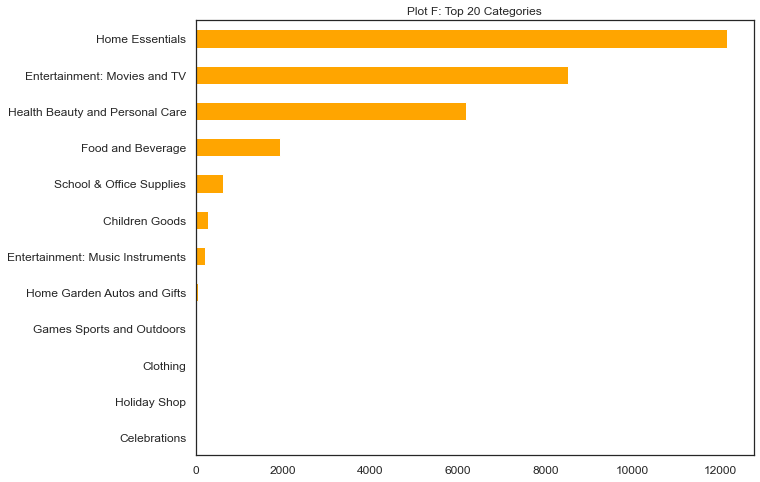

In [24]:

result = df[(df['prod_cat'] == True)]

df['prod_cat'].value_counts()[0:25].sort_values().plot(kind = 'barh', figsize=[10,8], fontsize=12,color='orange',
                                          title='Plot F: Top 20 Categories')

#####  2.4.10: Understanding Review Trends
- by year (indicating historical trend),
- by month (indicating seasonality), and
- by Ratings (indicating Ratings trend which directly communicates sentiment)
- This is across all the Products

In [25]:
# Refer reviews_onlydate column, splitting it into seperate columns of Date(%d), Month(%m), and Year(%Y)

# Step1: Extract 'date' component from the 'reviews_date' column AND writing it to 'reviews_onlydate' 
df['reviews_onlydate'] = df['reviews_date'].str[:10]
df['reviews_onlydate'].head()

# Step2: Segregate date component into seperate columns of Date(format %d), Month(format %m), and Year(format %Y)
# Next set the datatype for the extracted date components (Date, Month, Year)
df['reviews_onlydate'] = pd.to_datetime(df['reviews_onlydate'], errors='coerce').dt.date
df['reviews_onlydate'].fillna(df['reviews_onlydate'].value_counts().idxmax(),inplace=True)
df['reviews_onlydate'] = pd.to_datetime(df.reviews_onlydate, format='%Y-%m-%d')
df['reviews_onlydate'].head()

0   2012-11-30
1   2017-07-09
2   2017-07-09
3   2016-01-06
4   2016-12-21
Name: reviews_onlydate, dtype: datetime64[ns]

In [26]:
# Step3: Segregate the date into seperate columns of date month and year

df['month'] = df['reviews_onlydate'].dt.month
df['year'] = df['reviews_onlydate'].dt.year

In [27]:
# Understanding the Reviews data by year, in descending order

df.year.value_counts(ascending = False)

2014    8377
2015    6458
2016    4956
2012    4364
2017    3154
2013    1334
2009     487
2011     454
2010     381
2008      22
2007      10
2018       3
Name: year, dtype: int64

In [28]:
# Understanding the Reviews data by month

df.month.value_counts(ascending = False)

1     7508
12    5945
2     2999
10    1986
11    1923
9     1845
3     1498
8     1381
5     1317
4     1290
6     1214
7     1094
Name: month, dtype: int64

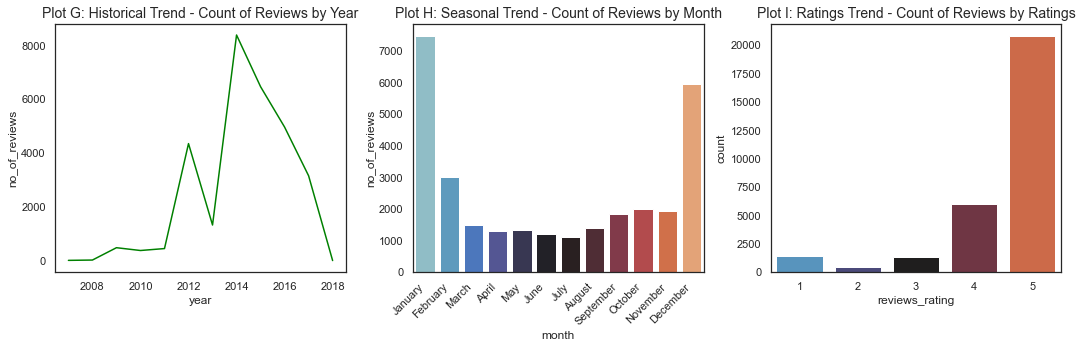

In [29]:
# Plotting Review Trends, setting the axes, the labels, dataset for plots and hue
f, axes = plt.subplots(1,3, figsize=(15,5))

# Plot for Reviews by Year which is historical trend
yearly = df.groupby(['year'])['reviews_username'].count().reset_index()
yearly = yearly.rename(columns={'reviews_username':'no_of_reviews'})
yearChart = sns.lineplot(x='year',y='no_of_reviews',data=yearly, ax = axes[0], color = 'green')
yearChart.set_title('Plot G: Historical Trend - Count of Reviews by Year', fontsize=14)

# Plot for Reviews by Month which is seasonal trend
monthly = df.groupby(['month'])['reviews_username'].count().reset_index()
monthly['month'] = monthly['month'].apply(lambda x : calendar.month_name[x])
monthly = monthly.rename(columns={'reviews_username':'no_of_reviews'})
monthChart = sns.barplot(x='month',y='no_of_reviews',data=monthly, ax = axes[1], palette = 'icefire')
monthChart.set_title('Plot H: Seasonal Trend - Count of Reviews by Month', fontsize=14)
monthChart.set_xticklabels(monthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

# AND now overall ratings as per Reviews for all the products
sns.countplot(x = 'reviews_rating', data=df, ax = axes[2], palette = 'icefire').set_title('Plot I: Ratings Trend - Count of Reviews by Ratings', fontsize=14)

f.tight_layout()

##### Inference:
<b><i>Historical Trend of Reviews (By Year) - Refer Plot G above</i></b>
- Initial years - till 2011 - we have only very few reviews
- Next - 2011 -2013 - we have a steep increase followed by sharp drop
- Reviews increase substantially from  2013 - 2015
- Reviews again drop steeply from 2016 onwards

<b><i>Seasonal Trend of Reviews (By Month) - Refer Plot H above</i></b>
- Its clear that late part of Holiday season and right after the Holiday Season - i.e. December, January - number of reviews are highest, possibly with Shoppers doing lot of shopping and then providing Reviews after initial usage of products
- Rest of the months, count of Reviews is low most likely with Shoppers not doing as much Product buys

<b><i>Overall Ratings Trend - Refer Plot I above</i></b>
- Very high rating provided by Shoppers, maximum count of reviews is for Rating Score = 5 followed by Rating Score = 4
- Low Ratings are few with highest low Ratings for Rating Score = 3 followed by Rating Score = 1
- Least amount of Shoppers have given a Rating Score = 2

#####  2.4.11: Understanding Ratings Distribution by Product ID

In [30]:
# Ratings Distribution by Product id
ratings=pd.DataFrame(df.groupby('id')['reviews_rating'].mean())
ratings['Number_Of_Ratings']=pd.DataFrame(df.groupby('id')['reviews_rating'].count())
ratings.head()

,reviews_rating,Number_Of_Ratings
id,,
AV13O1A8GV-KLJ3akUyj,5.000000,1
AV14LG0R-jtxr-f38QfS,5.000000,2
AV16khLE-jtxr-f38VFn,2.518519,27
AV1YGDqsGV-KLJ3adc-O,4.129310,348
AV1YIch7GV-KLJ3addeG,5.000000,1


##### Inference:
- A very small count of products have very few ratings received by Shoppers

##### 2.4.12: Distribution - Product Category vs Rating

In [31]:
df['brand'].nunique()

214

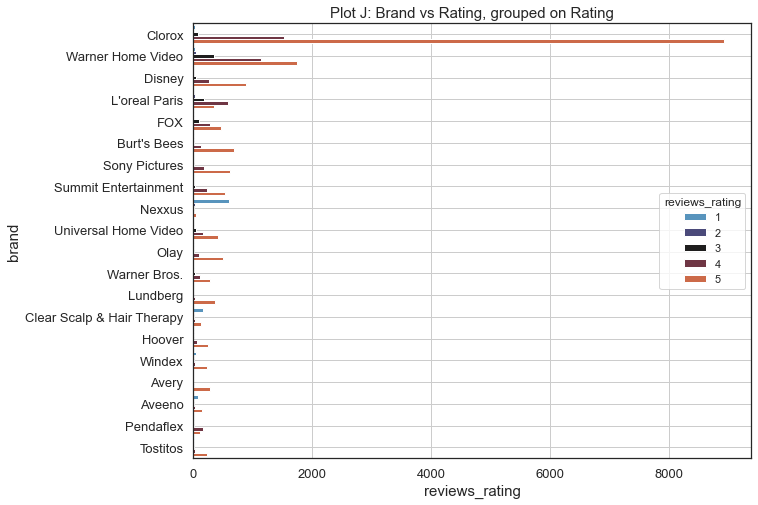

In [32]:
# Brand vs Rating

plt.figure(figsize=(10,8))
ax = sns.countplot(y=df['brand'], hue=df['reviews_rating'], palette = 'icefire', order=df['brand'].value_counts().iloc[:20].index)
ax.set_xlabel(xlabel="reviews_rating", fontsize=15)
ax.set_ylabel(ylabel='brand', fontsize=15)
ax.axes.set_title('Plot J: Brand vs Rating, grouped on Rating', fontsize=15)
ax.tick_params(labelsize=13)
plt.grid()
plt.show()

##### 2.4.13: Distribution - Product Category vs Rating

In [33]:
df['prod_cat'].nunique()

12

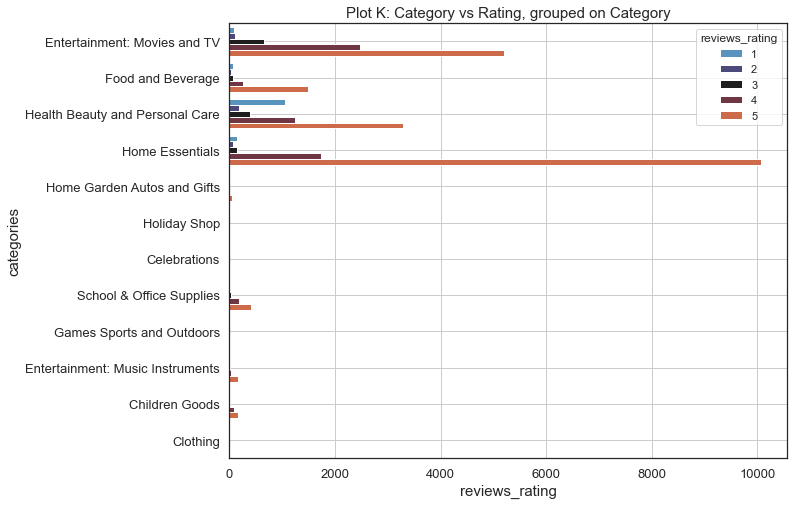

In [34]:
# Categories vs Rating

plt.figure(figsize=(10,8))
ax = sns.countplot(y=df['prod_cat'], hue=df['reviews_rating'], palette = 'icefire')
ax.set_xlabel(xlabel="reviews_rating", fontsize=15)
ax.set_ylabel(ylabel='categories', fontsize=15)
ax.axes.set_title('Plot K: Category vs Rating, grouped on Category', fontsize=15)
ax.tick_params(labelsize=13)
plt.grid()
plt.show()

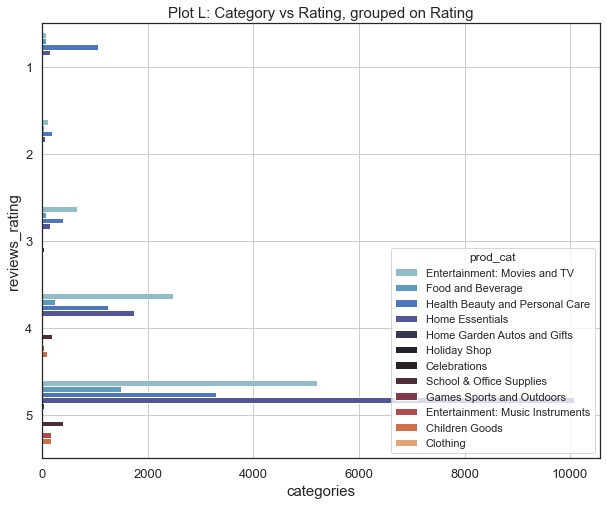

In [35]:
# Categories vs Rating - reverse axes

plt.figure(figsize=(10,8))
ax = sns.countplot(y=df['reviews_rating'], hue=df['prod_cat'], palette = 'icefire')
ax.set_xlabel(xlabel="categories", fontsize=15)
ax.set_ylabel(ylabel='reviews_rating', fontsize=15)
ax.axes.set_title('Plot L: Category vs Rating, grouped on Rating', fontsize=15)
ax.tick_params(labelsize=13)
plt.grid()
plt.show()

#####  2.4.14: Understanding Ratings Distribution - statistical analysis of Ratings data
- Distribution of count of Ratings
- Distribution of mean Ratings
- Distribution of Reviews by Word Length
- Distribution of Review Word Length by Overall Ratings

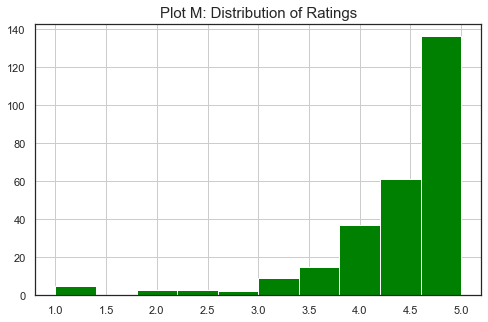

In [36]:
# Distribution of mean ratings

plt.figure(figsize=(8,5))
plt.hist(ratings.reviews_rating, color = 'green')
plt.title('Plot M: Distribution of Ratings', fontsize=15)
plt.grid()
plt.show()

In [37]:
ratings.describe()

,reviews_rating,Number_Of_Ratings
count,271.000000,271.000000
mean,4.374025,110.701107
std,0.749857,586.875174
min,1.000000,1.000000
25%,4.127155,3.000000
50%,4.600000,8.000000
75%,4.909091,29.000000
max,5.000000,8545.000000


<ipython-input-38-e6f62545307a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



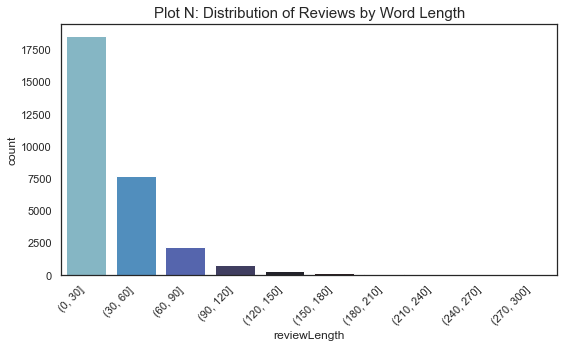

In [38]:
# Distribution of Reviews by word length - helps understand the strength of sentiment

f = plt.figure(figsize=(8,5))
df_reviews = df[['id','reviews_username','reviews_text','reviews_title','reviews_rating']]
df_reviews['reviewLength'] = df_reviews['reviews_text'].apply(lambda x: len(x.split()))

reviews_word_length = df_reviews.groupby(pd.cut(df_reviews.reviewLength, np.arange(0,330,30))).count()
reviews_word_length = reviews_word_length.rename(columns={'reviewLength':'count'})
reviews_word_length = reviews_word_length.reset_index()

reviewLengthChart = sns.barplot(x='reviewLength',y='count',data=reviews_word_length,palette = 'icefire')
reviewLengthChart.set_title('Plot N: Distribution of Reviews by Word Length', fontsize=15)
reviewLengthChart.set_xticklabels(reviewLengthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

f.tight_layout()

##### Inference:
- Very few Shoppers have provided detailed Review
- More than half of the Reviews are less than 30 words

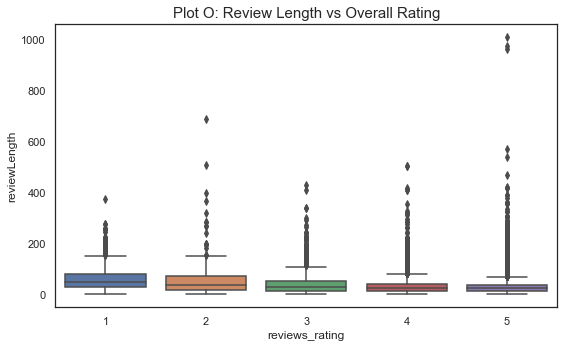

In [39]:
# Distribution of Review Lengths by Ratings - Demonstrates How Length of Reviews relates to Ratings

f = plt.figure(figsize=(8,5))

# Distribution of Length of Reviews by Rating - Box Plot
reviewLength_vs_Rating = df_reviews[['id','reviewLength','reviews_rating']]
reviewLength_vs_Rating = sns.boxplot(x='reviews_rating', y='reviewLength', data=reviewLength_vs_Rating)
reviewLength_vs_Rating.set_title('Plot O: Review Length vs Overall Rating', fontsize=15)

f.tight_layout()

##### Inference:
- Above plot clearly demonstrates that Review Lengths and Ratings are strongly related, for increasing Review Lengths the Rating is increasingly falling

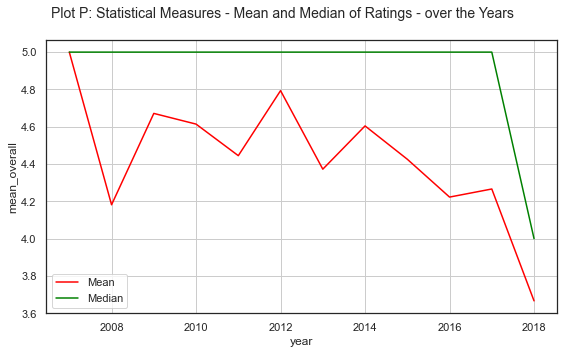

In [40]:
# Statistical Measures of Overall Ratings - Mean and Median - by Year
f = plt.figure(figsize=(8,5))

# Mean
stat_reviews_yearly = df.groupby(['year'])['reviews_rating'].mean().reset_index()
stat_reviews_yearly = stat_reviews_yearly.rename(columns={'reviews_rating':'mean_overall'})

# Median
median_yearly = df.groupby(['year'])['reviews_rating'].median().reset_index()
stat_reviews_yearly['median_overall'] = median_yearly['reviews_rating']

# Plotting the Statistical Measures
sns.lineplot(x='year',y='mean_overall',data=stat_reviews_yearly, label = 'Mean',  markers=True, color = 'red')
sns.lineplot(x='year',y='median_overall',data=stat_reviews_yearly, label = 'Median', markers=True, color = 'green')
f.suptitle('Plot P: Statistical Measures - Mean and Median of Ratings - over the Years', fontsize=14)  
plt.grid()
f.tight_layout()

##### Inference:
- Mean rating of the products has reduced over the years
- Median Rating has stayed constant at Rating Score = 5 till 2017 and then falls sharply
- It could possibly mean the product quality has fallen or Reviewers have higher expectation over the years or competing product - not covered in the data here - are having much better customer satisfaction thus dropping Ratings for the products covered in this dataset  

#####  2.4.15: Understanding Reviewers Distribution
- Count of Reviews by Users

In [41]:
# Distribution of number of reviews written by each user

user_reviews_df = df[['reviews_username','id']]
user_reviews_df = user_reviews_df.groupby(['reviews_username']).count().reset_index()
user_reviews_df = user_reviews_df.sort_values('id',ascending = False)
user_reviews_df = user_reviews_df.rename(columns={'id':'review count'})
user_reviews_df.head()

,reviews_username,review count
3403,byamazon customer,41
15805,mike,41
4749,chris,32
13806,lisa,16
19558,rick,15


In [42]:

user_reviews_df_1 = user_reviews_df.groupby('review count')['reviews_username'].count().reset_index()
user_reviews_df_1 = user_reviews_df_1.rename(columns={'review count':'number of reviews done'})
user_reviews_df_1 = user_reviews_df_1.rename(columns={'reviews_username':'count of reviewers'})

user_reviews_df_1

,number of reviews done,count of reviewers
0,1,21304
1,2,3008
2,3,338
3,4,108
4,5,60
5,6,36
6,7,16
7,8,11
8,9,7
9,10,5


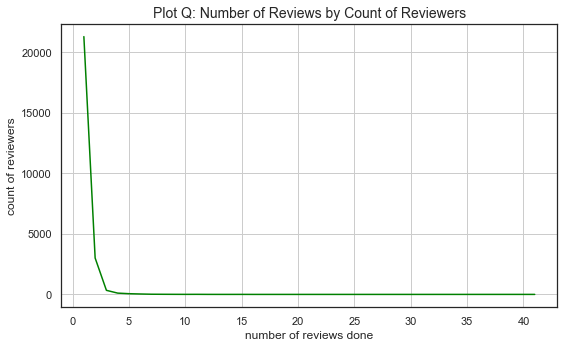

In [43]:
f = plt.figure(figsize=(8,5))
user_review_chart = sns.lineplot(x = 'number of reviews done',y = 'count of reviewers',data = user_reviews_df_1, color = 'green')
user_review_chart.set_title('Plot Q: Number of Reviews by Count of Reviewers', fontsize = 14)
plt.grid()
f.tight_layout()

### 3. Data Pre-processing

#### 3.1: Handling Duplication in Reviews
- like same product, same user but multiple reviews at same time
- same product having variations - like different flavours - reviewed by same user at various timings

In [44]:
# Download NLTK packages
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11002]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11002]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11002]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11002] getaddrinfo failed>


In [45]:
# Lets understand presence of duplicate reviews in dataset by Listing count of duplicate reviews

duplicates = df[df.duplicated(subset={"reviews_username","id"})]
duplicates.reviews_username.value_counts()

byamazon customer    39
mike                 24
chris                19
tony                  7
dave                  6
                     ..
mere5683              1
jpalms                1
lazar                 1
joanie                1
cleansmells           1
Name: reviews_username, Length: 2116, dtype: int64

In [46]:
# Lets take example of User (Reviewer/Shopper) = 'byamazon customer' to look at review data

df[df['reviews_username'] == 'byamazon customer']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,prod_cat,reviews_onlydate,month,year
16778,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-02-03T00:00:00.000Z,Null,Null,1,A waste of my money I don't know what kind of ...,Dyed Rice,byamazon customer,Positive,Food and Beverage,2016-02-03,2,2016
16799,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2017-01-07T00:00:00.000Z,Null,Null,4,"Good but if you like it, get it in quantity",Yum,byamazon customer,Positive,Food and Beverage,2017-01-07,1,2017
16807,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2015-08-19T00:00:00.000Z,Null,Null,4,RICE LOOKS GOOD.,RICE IS FINE,byamazon customer,Positive,Food and Beverage,2015-08-19,8,2015
16812,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2015-04-08T00:00:00.000Z,Null,Null,4,I love the zip lock seal on these bags (unique...,I love the zip lock seal on these bags (unique...,byamazon customer,Positive,Food and Beverage,2015-04-08,4,2015
16824,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2011-07-20T00:00:00.000Z,Null,Null,4,Lundberg Jubilee is a blend of sweet brown ric...,Beautiful and High-Quality Rice But Too Much S...,byamazon customer,Positive,Food and Beverage,2011-07-20,7,2011
16841,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2017-06-05T00:00:00.000Z,Null,Null,5,This takes much longer to cook but the taste i...,Happy,byamazon customer,Positive,Food and Beverage,2017-06-05,6,2017
16850,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2017-04-20T00:00:00.000Z,Null,Null,5,Great rice in a small package...I'll be buying...,Recommended,byamazon customer,Positive,Food and Beverage,2017-04-20,4,2017
16904,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-07-03T00:00:00.000Z,Null,Null,5,Very tasty! Very earthy rice great for breakfa...,Lindberg is just the best!,byamazon customer,Positive,Food and Beverage,2016-07-03,7,2016
16920,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-06-23T00:00:00.000Z,Null,Null,5,It was great. Very convenient in the 1 lb bags.,Five Stars,byamazon customer,Positive,Food and Beverage,2016-06-23,6,2016
16929,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-02-20T00:00:00.000Z,Null,Null,5,Good rice.,Five Stars,byamazon customer,Positive,Food and Beverage,2016-02-20,2,2016


##### Inference:
- User (Reviewer/Shopper) 'byamazon customer' has written multiple reviews at approximately same time  
- Reviews are for same product, same Brand, but different flavors, different review titles, and different ratings  

<i>To avoid confusion this duplication in data causes, we can proceed taking Mean of Ratings for such duplicate reviews thus making data meaningful</i>

In [47]:
# Take Mean of Ratings

df['avg_ratings'] = df.groupby(['id','reviews_username'])['reviews_rating'].transform('mean')
df['avg_ratings']=df['avg_ratings'].round(2)
df[['id','reviews_username','reviews_rating','avg_ratings']]

,id,reviews_username,reviews_rating,avg_ratings
0,AV13O1A8GV-KLJ3akUyj,joshua,5,5.0
1,AV14LG0R-jtxr-f38QfS,dorothy w,5,5.0
2,AV14LG0R-jtxr-f38QfS,dorothy w,5,5.0
3,AV16khLE-jtxr-f38VFn,rebecca,1,1.0
4,AV16khLE-jtxr-f38VFn,walker557,1,1.0
...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,laurasnchz,5,5.0
29996,AVpfW8y_LJeJML437ySW,scarlepadilla,5,5.0
29997,AVpfW8y_LJeJML437ySW,liviasuexo,5,5.0
29998,AVpfW8y_LJeJML437ySW,ktreed95,5,5.0


In [48]:
# Now delete duplicate Reviews for same product ID and User (Reviewer/Shopper)

df_final =  df.drop_duplicates(subset={"reviews_username","id"},keep="first")

In [49]:
# Validate deletion of duplicates for User = 'byamazon customer'

df_final[df_final['reviews_username'] == 'byamazon customer']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,prod_cat,reviews_onlydate,month,year,avg_ratings
16778,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-02-03T00:00:00.000Z,Null,Null,1,A waste of my money I don't know what kind of ...,Dyed Rice,byamazon customer,Positive,Food and Beverage,2016-02-03,2,2016,4.58
26450,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2017-07-05T00:00:00.000Z,Null,Null,1,"The first time I used in my infant, he rubbed ...",Not Tear Free Not Useful,byamazon customer,Positive,Health Beauty and Personal Care,2017-07-05,7,2017,3.41


In [50]:
# Understand new size of dataset after removal of duplicate Reviews

size_diff = df_final['id'].size/df['id'].size

print("%.2f%% reduction in data post duplicate review deletion"%((1-size_diff)*100))
print("Revised size of data = ",df_final['id'].size,"rows ")

7.98% reduction in data post duplicate review deletion
Revised size of data =  27605 rows 


In [51]:
# Understand Mean of Ratings in the dataset

df_final["avg_ratings"].mean()

4.522550384225026

In [52]:
# Understand Median of Ratings in the dataset

df_final["avg_ratings"].median()

5.0

#### 3.2: Prepare data for Sentiment Analysis
- Combining Reviews Title and Reviews Text so as to provide richer sentiment analysis data
- Noise removal - Clean the Review data since its free flowing text, remove Stop words
- Prepare Word Cloud to get a feel for Sentiments via check of frequency of Words in Reviews

##### 3.2.1: Combining the Review Title and Review Text data into a new column

In [53]:
# Combine reviews_title and reviews_text and save as new column "user_reviews"
# Add a period at the end of Review Titles in the new column 
# For Review Title with missing values, adding blank spaces

df_final['reviews_title'] = df_final['reviews_title'].fillna('')
df_final['user_reviews'] = df_final[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')

<ipython-input-53-2111ea1dfadd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-2111ea1dfadd>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
# Validate output of new column user_reviews

df_final[['reviews_title','reviews_text','user_reviews']].head(5)

,reviews_title,reviews_text,user_reviews
0,Just Awesome,i love this album. it's very good. more to the...,Just Awesome. i love this album. it's very goo...
1,Good,Good flavor. This review was collected as part...,Good. Good flavor. This review was collected a...
3,Disappointed,I read through the reviews on here before look...,Disappointed. I read through the reviews on he...
4,Irritation,My husband bought this gel for us. The gel cau...,Irritation. My husband bought this gel for us....
5,Not worth it,My boyfriend and I bought this to spice things...,Not worth it. My boyfriend and I bought this t...


##### 3.2.2: Noise removal - Cleaning the free flowing Review data

In [55]:
# Removing HTML Tags from Review data
# Defining a Function to remove html tags
# Function structure: 1. Find the pattern and 2. Substitute with nothing

def striphtml(data):
    p = re.compile('<.*?>')
    return p.sub('',data)

In [56]:
# Removing Punctuations from Review data
# Defining a Function to remove All punctuations
# Function structure: 1. Find the pattern and 2. Substitute with nothing

def strippunc(data):
    p = re.compile(r'[?|!|\'|"|#|.|,|)|(|\|/|~|%|*]')
    return p.sub('',data)

In [57]:
# Initiatilize StopWords

stop = stopwords.words('english')

In [58]:
# Initiatilize Snowball Stemmer

snow = SnowballStemmer('english')

In [59]:
# Defining a Function for NLTK tags to Wordnet tags

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [60]:
# Defining a Function to tokenize the sentence and determine the POS tag for respective tokens

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) #tuple of (token, wordnet_tag)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None: #if no available tag, append the token ASIS, else use the tag to lemmatize the token
            lemmatized_sentence.append(snow.stem(word)) #no lemma, stem the word
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag)) #lemmatize the token
    return " ".join(lemmatized_sentence)

In [61]:
# Defining a Function for Pre-processing output

def preprocess_text(text, stem=False): 
 
  text=text.lower()                # transform to lower case
  text = striphtml(text)           # remove HTML Tags using earlier defined function
  text = strippunc(text)           # remove Punctuation using earlier defined function
  return lemmatize_sentence(text)

In [62]:
# Pre-processing the dataset for user_reviews column & creating a 'Review' column which will be used for further analysis
# Additionally removing stop words from the new column - Review

df_main = df_final.copy(deep = True)
df_main['Review'] = df_main['user_reviews'].map(preprocess_text)
df_main['Review'] = df_main['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_main.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,prod_cat,reviews_onlydate,month,year,avg_ratings,user_reviews,Review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,Null,Null,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,Entertainment: Movies and TV,2012-11-30,11,2012,5.0,Just Awesome. i love this album. it's very goo...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,Null,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,Food and Beverage,2017-07-09,7,2017,5.0,Good. Good flavor. This review was collected a...,good good flavor review collect part promotion
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,Health Beauty and Personal Care,2016-01-06,1,2016,1.0,Disappointed. I read through the reviews on he...,disappointed read review befor look buy one co...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,Health Beauty and Personal Care,2016-12-21,12,2016,1.0,Irritation. My husband bought this gel for us....,irritation husband buy gel us gel cause irrita...
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,samantha,Negative,Health Beauty and Personal Care,2016-04-20,4,2016,1.0,Not worth it. My boyfriend and I bought this t...,worth boyfriend buy spice thing bedroom highly...


In [63]:
# Printing Review column output for first record as a sample to validate

df_main['Review'][0]

'awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy'

#### 3.2.3: Common and Rare Words in Corpus

In [64]:
# Defining a function for plotting Top n Common Words in column

def common_wds(column, terms, title_label):
  all_words_column = ' '.join([text for text in column])
  all_words_column = all_words_column.split()

  fr_dist = FreqDist(all_words_column)
  words_df = pd.DataFrame({'word':list(fr_dist.keys()), 'count':list(fr_dist.values())})

  word_rank = words_df.nlargest(columns="count", n = terms)   # Select Top 20 most frequent words
  plt.figure(figsize=(10,5))
  ax = sns.scatterplot(data=word_rank, x= "count", y = "word", color = "green")
  ax.set(ylabel = 'common words')
  plt.title(title_label, fontsize = 14)
  plt.grid()
  plt.show()

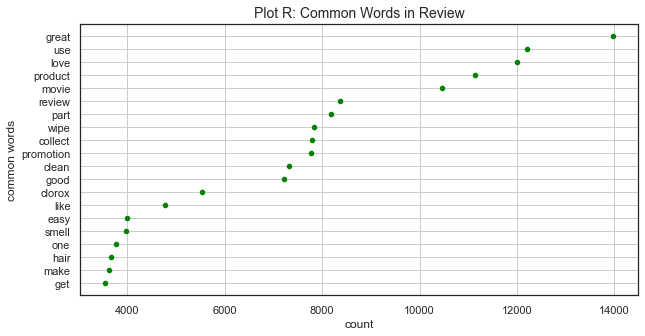

In [65]:
# Plotting Common Words in Review column ranked upto 20

common_wds(df_main['Review'],20,'Plot R: Common Words in Review')

In [66]:
# Defining a Function for plotting least occurring words in column

def rare_wds(column, terms, title_label):
  all_words_column = ' '.join([text for text in column])
  all_words_column = all_words_column.split()

  fr_dist = FreqDist(all_words_column)
  words_df = pd.DataFrame({'word':list(fr_dist.keys()), 'count':list(fr_dist.values())})

  # selecting top 20 most frequent words
  word_rank = words_df.nsmallest(columns="count", n = terms) 
  plt.figure(figsize=(10,5))
  ax = sns.scatterplot(data=word_rank, x= "count", y = "word", color = "green")
  ax.set(ylabel = 'rare words')
  plt.title(title_label, fontsize = 14)
  plt.grid()
  plt.show()

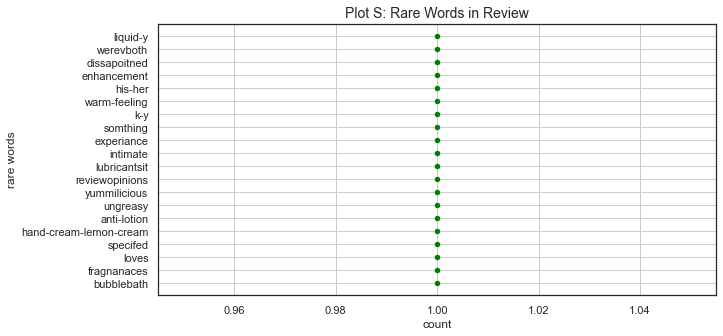

In [67]:
# Plotting Rare Words in Review column ranked upto 20

rare_wds(df_main['Review'],20, 'Plot S: Rare Words in Review')

#### 3.2.3: Average Word Length in Review data

In [68]:
# Defining a Function to measure average word length in Review column

def avg_wd_len(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df_main['Review_avgwdln'] = df_main['Review'].apply(lambda x: avg_wd_len(x))
df_main[['Review_avgwdln','Review']].head(5)

,Review_avgwdln,Review
0,4.850000,awesome love album good hip hop side current p...
1,5.714286,good good flavor review collect part promotion
3,6.066667,disappointed read review befor look buy one co...
4,5.200000,irritation husband buy gel us gel cause irrita...
5,5.739130,worth boyfriend buy spice thing bedroom highly...


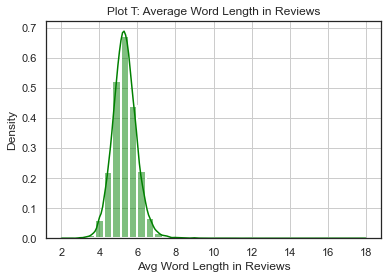

In [69]:
# Plotting Average Word Length

sns.histplot(df_main['Review_avgwdln'], kde=True, stat="density", linewidth=2, bins=int(180/5), color = 'green')
plt.title('Plot T: Average Word Length in Reviews')
plt.xlabel('Avg Word Length in Reviews')
plt.ylabel('Density')
plt.grid()
plt.show()

##### 3.2.3: Word Cloud for Review data
- Word Cloud for reviews title
- Word Cloud for reviews text
- Word Cloud for Review (that includes both title and text)

In [70]:
# Defining a function to deliver Word CLouds

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
from matplotlib import pyplot as plt

def display_wc(data, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random with a coin flip
).generate(str(data))

    fig = plt.figure(1, figsize=(10, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.5)

    plt.imshow(wordcloud)
    plt.show()

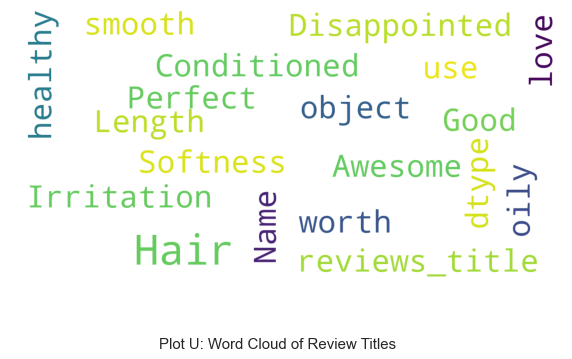

In [71]:
# Word Cloud for reviews title

display_wc(df_final['reviews_title'],'Plot U: Word Cloud of Review Titles')

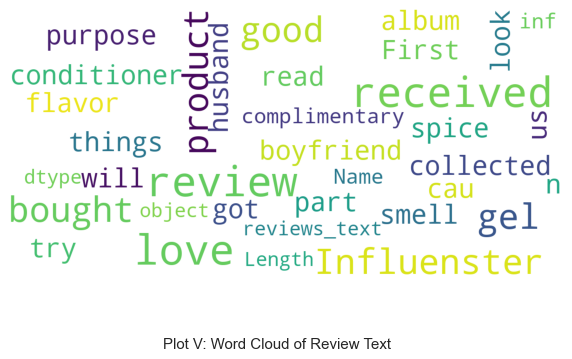

In [72]:
# Word Cloud for reviews text

display_wc(df_final['reviews_text'],'Plot V: Word Cloud of Review Text')

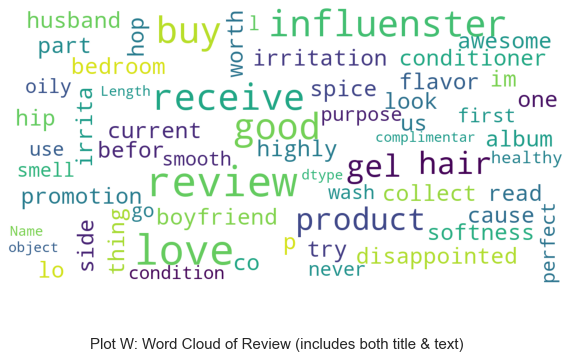

In [73]:
# Word Cloud for Review - that includes both title and text

display_wc(df_main['Review'], 'Plot W: Word Cloud of Review (includes both title & text)')

### 4. Sentiment Analysis

In [74]:
# Cleaning data frame dropping irrelevant data

df_main=df_main[['Review','reviews_rating','user_sentiment']]
data=df_main
df_main.head()

,Review,reviews_rating,user_sentiment
0,awesome love album good hip hop side current p...,5,Positive
1,good good flavor review collect part promotion,5,Positive
3,disappointed read review befor look buy one co...,1,Negative
4,irritation husband buy gel us gel cause irrita...,1,Negative
5,worth boyfriend buy spice thing bedroom highly...,1,Negative


In [75]:
#Size of data frame:

df_main.shape

(27605, 3)

In [76]:
# Basic check for unique values and missing data values

print("Unique data values in data frame:")
df_main.nunique(axis=0)

Unique data values in data frame:


Review            26753
reviews_rating        5
user_sentiment        2
dtype: int64

In [77]:
# Save data for later usage

import pickle as pickle
pickle.dump(data, open("data.pkl","wb"))

In [78]:
from pathlib import Path
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(data['Review'])
X = tfidf_vectorizer.transform(data['Review'])
y = data['user_sentiment']

# Saving the vocabulary used in tfidf vectorizer as features
pickle.dump(tfidf_vectorizer.vocabulary_, open("features.pkl","wb"))

# Split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [79]:
### Class Imbalance check and method to handle it
data.groupby(['user_sentiment']).count()

,Review,reviews_rating
user_sentiment,,
Negative,3058,3058
Positive,24547,24547


##### Note:
- It appears we have imbalanced training data set
- However considering we have valid sentiment data in user_sentiment column (and the data quality is very good for this colum), the dataset is valid and we will continue with the dataset.  There is no need to do use oversampling or undersampling techniques.

### 5. Scoring of Classifiers 

In [80]:
# Defining a Function to calculate confusion matrix and display scores for various ML models

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

def display_model_score(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    plot_confusion_matrix(classifier, X_test, y_test,include_values=True,values_format='g',cmap=plt.cm.Greens) 
    p_acc = float(accuracy_score(y_test, classifier.predict(X_test)))
    p_sen = float(format(cm[1][1]/sum(cm[1])))
    p_spe = float(format(cm[0][0]/sum(cm[0])))
    p_pre = float(format(cm[1][1]/((cm[1][1])+(cm[0][1]))))
    p_f1s = float(format(2*cm[1][1]/(((cm[1][1])+(cm[0][1]))+sum(cm[1]))))
    print(classifier)
    print('\n')
    print(f"Accuracy is {p_acc:.4f}")
    print(f"Sensitivity is {p_sen:.4f}")
    print(f"Specificity is {p_spe:.4f}")
    print(f"Precision is {p_pre:.4f}")
    print(f"F1 Score is {p_f1s:.4f}")
    return p_acc, p_sen, p_spe, p_pre, p_f1s

### 6. Evaluating the model choices

- Build multiple Machine Learning models among below 4 taking class imbalance and hyperparameter tuning into consideration:  
&emsp;1. Logistic Regression  
&emsp;2. Random Forest  
&emsp;3. XGBoost  
&emsp;4. Naive Bayes  
- Analyse the performance of each of the models
- Confirm the best fit model 

In [81]:
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS


####  6.1: ML Model 1 - Logistic Regression

In [82]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    cm = confusion_matrix(y_test, lr.predict(X_test))
    print('Sensitivity for C = {0} is {1}'.format(c, cm[1][1]/sum(cm[1])))
    print('Specificity for C = {0} is {1}'.format(c, cm[0][0]/sum(cm[0])))
    print('Precision for C = {0} is {1}'.format(c, cm[1][1]/((cm[1][1])+(cm[0][1]))))

Sensitivity for C = 0.01 is 1.0
Specificity for C = 0.01 is 0.0
Precision for C = 0.01 is 0.8819182845552014
Sensitivity for C = 0.05 is 1.0
Specificity for C = 0.05 is 0.0
Precision for C = 0.05 is 0.8819182845552014
Sensitivity for C = 0.25 is 1.0
Specificity for C = 0.25 is 0.001226993865030675
Precision for C = 0.25 is 0.8820460802782205
Sensitivity for C = 0.5 is 1.0
Specificity for C = 0.5 is 0.011042944785276074
Precision for C = 0.5 is 0.8830697809371827
Sensitivity for C = 1 is 0.9988500082142271
Specificity for C = 1 is 0.033128834355828224
Precision for C = 1 is 0.885264997087944


In [83]:
final_lr = LogisticRegression(C=0.05)
final_lr.fit(X_train, y_train)

LogisticRegression(C=0.05)

LogisticRegression(C=0.05)


Accuracy is 0.8819
Sensitivity is 1.0000
Specificity is 0.0000
Precision is 0.8819
F1 Score is 0.9373


(0.8819182845552014, 1.0, 0.0, 0.8819182845552014, 0.937254600046193)

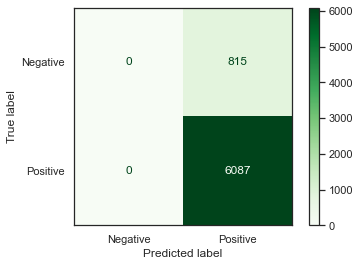

In [84]:
df_lr = display_model_score(final_lr)
df_lr

In [85]:
# saving the model - Logistic Regression

pickle.dump(final_lr, open('logistic_regression_model.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open("tfidf.pkl", "wb"))

In [86]:
feature_to_coef = {
    word: coef for word, coef in zip(
     tfidf_vectorizer.get_feature_names(), final_lr.coef_[0])
}

print('Positive Words')
for best_positive in sorted(
    feature_to_coef.items(),
    key=lambda x: x[1],
    reverse=True)[:10]:
    print(best_positive)
    
print('Negative Words')
for best_negative in sorted(
    feature_to_coef.items(),
    key=lambda x: x[1])[:10]:
    print(best_negative)

Positive Words
('great', 1.6618299416890778)
('love', 1.3657386406735814)
('good', 1.0515754134074802)
('clean', 0.9900714054576237)
('easy', 0.8558174330012852)
('movie', 0.6178281654577168)
('best', 0.6001072950082997)
('smell', 0.4580278727456101)
('easy use', 0.451079354837854)
('quick', 0.4159877956165835)
Negative Words
('bad', -0.6624322444922371)
('evil', -0.5188973083412677)
('resident', -0.4797369888216077)
('resident evil', -0.47530643198783296)
('formula', -0.44827400761751546)
('horrible', -0.3944274318348226)
('terrible', -0.34734248102726634)
('disappointed', -0.34724613843423974)
('gel', -0.34069590089420615)
('like', -0.32723786225050666)


#### 6.2: ML Model 2 - Random Forest Classifier (without hyperparameter tuning and with hyperparameter tuning)

In [87]:
# Random Forest classifier without any hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import GridSearchCV
final_rf = RandomForestClassifier()
final_rf.fit(X_train, y_train)

RandomForestClassifier()

RandomForestClassifier()


Accuracy is 0.8876
Sensitivity is 0.9990
Specificity is 0.0552
Precision is 0.8876
F1 Score is 0.9400


(0.887568820631701,
 0.9990142927550517,
 0.05521472392638037,
 0.8876076485184644,
 0.940021641675684)

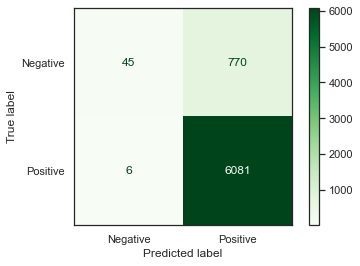

In [89]:
df_rf = display_model_score(final_rf)
df_rf

In [90]:
# saving the model - Random Forest

pickle.dump(final_rf, open('random_forest_model.pkl', 'wb'))

In [91]:
# Random Forest classifier with various hyperparameters
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15, 20],
    'min_samples_leaf': [100,200],
    'min_samples_split': [200,400],
    'n_estimators': [100, 300]
}

# Create a based model
final_rft = RandomForestClassifier()

# Instantiate the grid search model
rf_tuned = GridSearchCV(estimator = final_rft, param_grid = param_grid, scoring='roc_auc', cv = 3, n_jobs = -1,verbose = 1)
rf_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [200, 400],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)

In [92]:
# Print best hyperparameters

print("Best AUC-ROC Score on train data: ", rf_tuned.best_score_)
print("Best hyperparameters: ", rf_tuned.best_params_)

Best AUC-ROC Score on train data:  0.7548143772877172
Best hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 300}


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [200, 400],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)


Accuracy is 0.8819
Sensitivity is 1.0000
Specificity is 0.0000
Precision is 0.8819
F1 Score is 0.9373


(0.8819182845552014, 1.0, 0.0, 0.8819182845552014, 0.937254600046193)

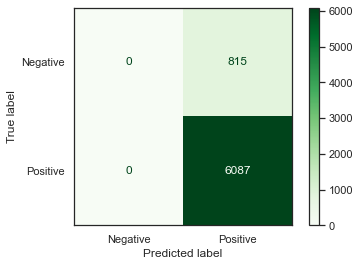

In [93]:
# Test data performance metrics
df_rft = display_model_score(rf_tuned)
df_rft

In [94]:
# saving the model - Random Forest with Hyperparameter Tuning

pickle.dump(rf_tuned, open('random_forest_tuned_model.pkl', 'wb'))

#### 6.3: ML Model 3 - Naive Bayes

In [95]:
# Fitting Naive Bayes Model

nb=MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

MultinomialNB()


Accuracy is 0.8819
Sensitivity is 1.0000
Specificity is 0.0000
Precision is 0.8819
F1 Score is 0.9373


(0.8819182845552014, 1.0, 0.0, 0.8819182845552014, 0.937254600046193)

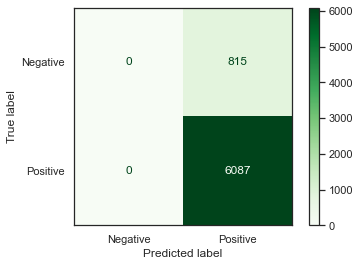

In [96]:
# Test Data Performance Metrics

df_nb = display_model_score(nb)
df_nb

In [97]:
# saving the model - Naive Bayes

pickle.dump(nb, open('naive_bayes_model.pkl', 'wb'))

#### 6.4: ML Model 4 - XGBoost Classifier (without hyperparameter tuning and with hyperparameter tuning)

In [98]:
# XGBoost classifier without any hyperparameter tuning

final_xgb = XGBClassifier(booster='gbtree')
final_xgb.fit(X_train, y_train)

C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:50:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Accuracy is 0.9094
Sensitivity is 0.9870
Specificity is 0.3301
Precision is 0.9167
F1 Score is 0.9506


(0.9094465372355839,
 0.987021521274848,
 0.3300613496932515,
 0.9166920964296613,
 0.9505577090420062)

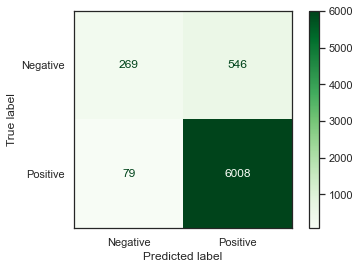

In [99]:
# Displaying Confusion matrix Scores

#Test data performance metrics
df_xgb = display_model_score(final_xgb)
df_xgb

In [100]:
# saving the model - XGBoost

pickle.dump(final_xgb, open('xgboost_model.pkl', 'wb'))

In [101]:
# XGBoost classifier with various custom hyperparameters

param_grid = {'learning_rate': [0.001, 0.01], 'max_depth':[ 5, 10],  'n_estimators':[1, 3]}

final_xgb = XGBClassifier(booster='gbtree')

# set up GridSearchCV()
xgb_tuned = GridSearchCV(estimator = final_xgb, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv =3, 
                        verbose = 1,
                        return_train_score=True)

xgb_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:52:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:52:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:52:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=N

In [102]:
# print best hyperparameters
print("Best AUC-ROC Score on train data: ", xgb_tuned.best_score_)
print("Best hyperparameters: ", xgb_tuned.best_params_)

Best AUC-ROC Score on train data:  0.7565961258939025
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 3}


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=N

(0.8817733990147784,
 0.9876786594381469,
 0.09079754601226994,
 0.890270990670813,
 0.9364485981308411)

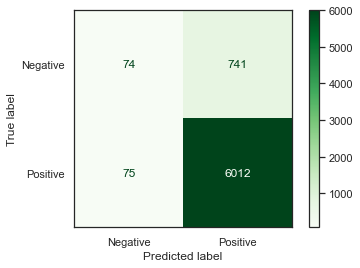

In [103]:
# Displaying Confusion matrix Scores

# Test data performance metrics
df_xgbt = display_model_score(xgb_tuned)
df_xgbt

In [104]:
# saving the model - XGBoost with Hyperparameter Tuning

pickle.dump(xgb_tuned, open('xgboost_tuned_model.pkl', 'wb'))

#### 6.5 Models Comparison

In [105]:
# Index: 0=Accuracy, 1=Sensitivity, 2=Specificity, 3=Precision, 4=F1Score

results = {('LR'):[df_lr[0],df_lr[1],df_lr[2],df_lr[3],df_lr[4]],
           ('NB'):[df_nb[0],df_nb[1],df_nb[2],df_nb[3],df_nb[4]],
           ('XGB'):[df_xgb[0],df_xgb[1],df_xgb[2],df_xgb[3],df_xgb[4]],
           ('XGB Tuned'):[df_xgbt[0],df_xgbt[1],df_xgbt[2],df_xgbt[3],df_xgbt[4]],
           ('RF'):[df_rf[0],df_rf[1],df_rf[2],df_rf[3],df_rf[4]],
           ('RF Tuned'):[df_rft[0],df_rft[1],df_rft[2],df_rft[3],df_rft[4]]
          }
pd.DataFrame(results, index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1Score'])

,LR,NB,XGB,XGB Tuned,RF,RF Tuned
Accuracy,0.881918,0.881918,0.909447,0.881773,0.887569,0.881918
Sensitivity,1.000000,1.000000,0.987022,0.987679,0.999014,1.000000
Specificity,0.000000,0.000000,0.330061,0.090798,0.055215,0.000000
Precision,0.881918,0.881918,0.916692,0.890271,0.887608,0.881918
F1Score,0.937255,0.937255,0.950558,0.936449,0.940022,0.937255


##### Score driving the model choice:
- Considering the user sentiment data - <i> in user_sentiment column in the sample30.csv dataset</i> - is unambiguous and of high quality, we will look at Accuracy, Precision, and F1Score in choosing our bext model as these are strongly driven on True Positive data.
- While Sensitivity and Specificity do provide good results, here in our case we can ignore these as the sentiment data is high quality and there is less play for True Negative OR False Negative dataset.

##### Observations on above Scores:
- XGBoost has the best Accuracy and F1Score 
- Random Forest has the next best Accuracy and F1Score

##### Inference:
- XGBoost without any hyperparameter tuning is the best model
- Random Forest without any hyperparameter tuning is the next best model 

In [106]:
import pickle
# Based on above execution, save the best trained model as a pickle string, saving next best model also - just in case

saved_model = pickle.dump(final_xgb, open('xgboost_model.pkl', 'wb'))
saved_model_2 = pickle.dump(final_rf, open('random_forest_model.pkl', 'wb'))

### 7: Building Recommendation System 
- User based recommendation
- User based prediction & evaluation
- Item based recommendation
- Item based prediction & evaluation

Different Approaches to develop Recommendation System -

1. Demographic based Recommendation System
2. Content Based Recommendation System
3. Collaborative filtering Recommendation System

In [107]:
# Importing Libraries

from sklearn.metrics.pairwise import pairwise_distances

In [108]:
# Read the original dataset

ratings = pd.read_csv("sample30.csv", sep=',')
ratings.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [109]:
ratings=ratings[['id', 'reviews_rating', 'reviews_username']]


In [110]:
# Checking for null values

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                30000 non-null  object
 1   reviews_rating    30000 non-null  int64 
 2   reviews_username  29937 non-null  object
dtypes: int64(1), object(2)
memory usage: 703.2+ KB


In [111]:
ratings = ratings[~ratings.reviews_username.isna()]
ratings.columns=['productId', 'rating', 'user']
ratings.head()

,productId,rating,user
0,AV13O1A8GV-KLJ3akUyj,5,joshua
1,AV14LG0R-jtxr-f38QfS,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,5,dorothy w
3,AV16khLE-jtxr-f38VFn,1,rebecca
4,AV16khLE-jtxr-f38VFn,1,walker557


#### 7.1: Splitting the dataset into train and test

In [112]:
# Test and Train split of the dataset

from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.30, random_state=12)

print(train.shape)
print(test.shape)

(20955, 3)
(8982, 3)


In [113]:
# Pivot the train ratings' dataset into matrix format in which columns are products and the rows are user IDs.

df_pivot = train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
).fillna(0)

df_pivot.head(3)

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 7.2 : Creating dummy train & dummy test dataset
These dataset will be used for prediction:  
- Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [114]:
# Copy the train dataset into dummy_train

dummy_train = train.copy()

dummy_train.head()

,productId,rating,user
27729,AVpfRTh1ilAPnD_xYic2,5,stevieboy23
17120,AVpf9pzn1cnluZ0-uNTM,5,byo.kelly
22028,AVpfnRuSilAPnD_xfB8l,3,linda h
16308,AVpf63aJLJeJML43F__Q,5,cocoacrazy
19457,AVpfJP1C1cnluZ0-e3Xy,5,vanessavast


In [115]:
# The products not rated by user is marked as 1 for prediction. 

dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)

In [116]:
# Convert the dummy train dataset into matrix format.

dummy_train = dummy_train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
).fillna(1)


dummy_train.head()

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### 7.3: User Cosine Similarity Matrix
- Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

In [117]:
df_pivot.index.nunique()

18188

In [118]:
# User Similarity Matrix via pairwise_distance function

user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.9486833 0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.        0.9486833 0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [119]:
user_correlation.shape

(18188, 18188)

#### 7.4: Using Adjusted Cosine
- Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes
- In other words, some users might rate items highly in general, and others might give items lower ratings as a preference
- To handle this nature from rating given by user, we can subtract average ratings for each user from each user's rating for different products

##### Note: In this case we are not removing the NaN values and calculating the mean only for the products rated by the user

In [120]:
# Create a user-product matrix.

df_pivot = train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
)

In [121]:
df_pivot.head()

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 7.5: Normalising the rating of the products for each user around 0 mean

In [122]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

df_subtracted.head()

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 7.6: Finding Cosine Similarity

In [123]:
# Creating the User Similarity Matrix using pairwise_distance function.

user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0

print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [124]:
user_correlation.shape

(18188, 18188)

#### 7.7: Prediction - User User
- Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [125]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset).  Calculating User predicted ratings. 

In [126]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.93649167,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [127]:
user_predicted_ratings.shape

(18188, 251)

In [128]:
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.93649167,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

##### Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by setting it to zero. 

In [129]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
00sab00,0.0,0.0,0.0,0.0,0.0,0.749669,0.0,0.944911,0.0,0.0,...,0.0,0.0,0.0,1.597933,0.0,0.0,0.0,0.0,1.936492,0.204124
01impala,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


##### Calculating the Top 20 Recommendations for the <i>user</i>

In [130]:
user_final_rating

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
00sab00,0.0,0.0,0.0,0.0,0.0,0.749669,0.0,0.944911,0.0,0.0,...,0.0,0.0,0.0,1.597933,0.0,0.0,0.0,0.0,1.936492,0.204124
01impala,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
zxcsdfd,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
zyiah4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [131]:
# Take the user ID as input
#user_input = input("Enter your user name") #2athome

user_input='2athome'
print(user_input)


2athome


In [132]:
user_final_rating.head(10)

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
00sab00,0.0,0.000000,0.000000,0.0,0.0,0.749669,0.0,0.944911,0.0,0.0,...,0.0,0.0,0.0,1.597933,0.0,0.0,0.0,0.0,1.936492,0.204124
01impala,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02dakota,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02deuce,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
08dallas,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1.11E+24,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
10ten,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
11111111aaaaaaaaaaaaaaaaa,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [133]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

productId
AVpfvieo1cnluZ0-qdnu    0.0
AVpf0kZFilAPnD_xi5QZ    0.0
AVpf5ZcH1cnluZ0-tL9V    0.0
AVpf5Z1zLJeJML43FpB-    0.0
AVpf5FF71cnluZ0-tHAV    0.0
AVpf5CnILJeJML43FjaU    0.0
AVpf4oLxLJeJML43FcxC    0.0
AVpf4WWN1cnluZ0-s7Wj    0.0
AVpf3okQLJeJML43FMif    0.0
AVpf3VOfilAPnD_xjpun    0.0
AVpf385g1cnluZ0-s0_t    0.0
AVpf2tw1ilAPnD_xjflC    0.0
AVpf1pwXLJeJML43EqpT    0.0
AVpf0thK1cnluZ0-r8vR    0.0
AVpf0pfrilAPnD_xi6s_    0.0
AVpf0eb2LJeJML43EVSt    0.0
AVpe8xjUilAPnD_xRkxC    0.0
AVpf0YhQLJeJML43ETff    0.0
AVpf0O60ilAPnD_xizE6    0.0
AVpf-lMV1cnluZ0-ub0_    0.0
Name: 2athome, dtype: float64

#### 7.8: Evaluation - User User 

##### Item Based Similarity
- Taking the transpose of the rating matrix to normalize the rating around the mean for different products ID. In the user based similarity, we had taken mean for each user instead of each products.

In [134]:
df_pivot = train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
).T

df_pivot.head()

user,00dog3,00sab00,01impala,02dakota,02deuce,08dallas,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,1234,...,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zyiah4,zzdiane,zzz1127
productId,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Normalising the Product rating for each product for using the Adujsted Cosine

In [135]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

df_subtracted.head()

user,00dog3,00sab00,01impala,02dakota,02deuce,08dallas,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,1234,...,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zyiah4,zzdiane,zzz1127
productId,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Finding the Cosine Similarity using pairwise distances approach

In [136]:
from sklearn.metrics.pairwise import pairwise_distances

# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)
print(item_correlation.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(251, 251)


##### Filtering for positive correlation - only for which the value is greater than 0

In [137]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### 7.9: Prediction - Item Item

In [138]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00666715, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00693369],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00554695]])

In [139]:
item_predicted_ratings.shape

(18188, 251)

In [140]:
dummy_train.shape

(18188, 251)

##### Filtering the rating only for the products not rated by the user for recommendation

In [141]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.006364,0.0,0.000000,...,0.0,0.014313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.006667,0.0,0.0,0.0,0.0,0.004563,0.000000,0.0,0.000896,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.011112,0.0,0.0,0.0,0.0,0.007606,0.000000,0.0,0.001493,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.008890,0.0,0.0,0.0,0.0,0.006084,0.000000,0.0,0.001195,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Calculating the Top 20 recommendation for the <i>user</i>

In [142]:
# Take the user ID as input
#user_input = input("Enter your user name")
user_input='44pam44'
print(user_input)

44pam44


In [143]:
# Recommending the Top 20 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

productId
AVpfJP1C1cnluZ0-e3Xy    0.977287
AVpfW8y_LJeJML437ySW    0.020768
AVpfTVkcilAPnD_xZLts    0.013471
AVpfluP1ilAPnD_xejxO    0.011236
AVpe6FfKilAPnD_xQmHi    0.007860
AVpfvieo1cnluZ0-qdnu    0.006934
AVpfBO2vLJeJML430mGh    0.005616
AVpe_N91LJeJML43z4jD    0.005572
AVpfRTh1ilAPnD_xYic2    0.004840
AVpf2tw1ilAPnD_xjflC    0.004746
AVpfrfHF1cnluZ0-pRai    0.004316
AVpf9_3MLJeJML43GvdB    0.004271
AVpfD9xTLJeJML431ig2    0.004171
AVpe6n2_LJeJML43yOgE    0.003930
AVpe8gsILJeJML43y6Ed    0.003771
AVpf0YhQLJeJML43ETff    0.003444
AVpfcu821cnluZ0-k8ep    0.003363
AVpe59io1cnluZ0-ZgDU    0.003353
AVpf5FF71cnluZ0-tHAV    0.003183
AVpf5olc1cnluZ0-tPrO    0.002896
Name: 44pam44, dtype: float64

In [144]:
# saving the model
pickle.dump(user_final_rating.astype('float32'), open('user_final_rating.pkl', 'wb'))

#### 7.10 Evaluation - Item Item
- Same Evaluation as for the prediction. Except that it will be evaluated for the products already rated by the User instead of predicting it for the products not rated by the User

In [145]:
test.columns

Index(['productId', 'rating', 'user'], dtype='object')

In [146]:
common =  test[test.productId.isin(train.productId)]
common.shape

(8962, 3)

In [147]:
common.head(4)

,productId,rating,user
19513,AVpfJP1C1cnluZ0-e3Xy,5,kanderson927
12599,AVpf3VOfilAPnD_xjpun,5,arib
1587,AVpe31o71cnluZ0-YrSD,4,karv
15380,AVpf5FF71cnluZ0-tHAV,5,xxacw12xx


In [148]:
common_item_based_matrix = common.pivot_table(index='user', columns='productId', values='rating').T

In [149]:
common_item_based_matrix.shape

(199, 8383)

In [150]:
item_correlation_df = pd.DataFrame(item_correlation)

In [151]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
item_correlation_df['productId'] = df_subtracted.index
item_correlation_df.set_index('productId',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
productId,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
list_name = common.productId.tolist()

In [154]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [155]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [156]:
item_correlation_df_3.head()

,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
productId,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.037657,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066184,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07508529, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00693369, 0.00693369, 0.01091379, ..., 0.        , 0.00693369,
        0.00277348]])

In [158]:
common_item_predicted_ratings.shape

(199, 8383)

##### Dummy Test for evaluation
- Dummy test to be used for evaluation.
- To evaluate, we will only make prediction on the products rated by the user. Thus this is marked as 1. This is just opposite of dummy_train.
- The products not rated is marked as 0 for evaluation. And make the item-item matrix representaion.

In [159]:
dummy_test = common.copy()

dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='user', columns='productId', values='rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [160]:
common_ = common.pivot_table(index='user', columns='productId', values='rating').T

In [161]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\Parul Kapoor\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning:

All-NaN slice encountered

C:\Users\Parul Kapoor\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning:

All-NaN slice encountered



In [165]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [168]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5

print(f"rmse is {rmse:.4f}")

rmse is 3.5456
